In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

Xử lý ảnh chuẩn bị cho quá trình training

In [ ]:
def preprocess_image(image):
    # Chuyển đổi ảnh sang thang độ xám
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Làm mờ ảnh để giảm nhiễu
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Sử dụng adaptive thresholding để làm nổi bật cạnh biển báo
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    return thresh

def find_largest_contour(edged):
    # Tìm các contours trong ảnh
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Chọn contour lớn nhất
        largest_contour = max(contours, key=cv2.contourArea)
        return largest_contour
    else:
        return None

def crop_sign(image, contour):
    # Tính toán bounding box cho contour lớn nhất
    x, y, w, h = cv2.boundingRect(contour)

    # Cắt ảnh ra từ bounding box
    cropped_image = image[y:y+h, x:x+w]

    return cropped_image


In [ ]:
source_dir = "/content/drive/MyDrive/Nhung/test/STOP"
count = 0

# Lặp qua tất cả các tệp tin trong thư mục nguồn
for filename in os.listdir(source_dir):
    # Kiểm tra xem tệp có phải là tệp ảnh không (có thể bạn cần kiểm tra đuôi tệp để chắc chắn)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(source_dir, filename)

        # Đọc ảnh từ file
        image = cv2.imread(image_path)

        # Tiền xử lý ảnh để phát hiện cạnh
        edged = preprocess_image(image)

        # Tìm contour lớn nhất
        largest_contour = find_largest_contour(edged)

        # Cắt ảnh chứa biển báo
        cropped_image = crop_sign(image, largest_contour)
        cv2.imwrite(image_path, cropped_image)
        count += 1

print(f"Done {count}")

Done 19


In [ ]:
import shutil
move = 1
# Đường dẫn đến thư mục chứa ảnh gốc
source_dir = "/content/drive/MyDrive/Nhung/signs_image/13"

# Đường dẫn đến thư mục mục tiêu
target_dir = "/content/drive/MyDrive/Nhung/signs_image/RIGHT_TURN_PROHIBITED"
# Lặp qua tất cả các tệp tin trong thư mục nguồn
for filename in os.listdir(source_dir):
    # Kiểm tra xem tệp có phải là tệp ảnh không (có thể bạn cần kiểm tra đuôi tệp để chắc chắn)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Tạo đường dẫn tới tệp nguồn và tệp mục tiêu
        source_file = os.path.join(source_dir, filename)
        target_file = os.path.join(target_dir, filename)
        # Di chuyển tệp từ thư mục nguồn đến thư mục mục tiêu
        shutil.move(source_file, target_file)
        move += 1
    if move > 100:
        break

print(f"{move} ảnh đã được chuyển sang thư mục mục tiêu thành công!")

37 ảnh đã được chuyển sang thư mục mục tiêu thành công!


In [ ]:
IMG_SIZE = 64

def read_image_from_folder(path, class_fire):
    images = []
    labels = []

    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            images.append(new_array)
            labels.append(class_fire)
        except Exception as e:
            pass

    return images, labels

In [ ]:
# Khởi tạo một danh sách để lưu trữ các ảnh và nhãn
images_train = []
labels_train = []

In [ ]:
image_dir_go = "/content/drive/MyDrive/Nhung/signs_image/AHEAD"
go = 0

images, labels = read_image_from_folder(image_dir_go, go)
images_train.extend(images)
labels_train.extend(labels)


image_dir_left = "/content/drive/MyDrive/Nhung/signs_image/TURN_LEFT"
left = 1

images, labels = read_image_from_folder(image_dir_left, left)
images_train.extend(images)
labels_train.extend(labels)


image_dir_right = "/content/drive/MyDrive/Nhung/signs_image/TURN_RIGHT"
right = 2

images, labels = read_image_from_folder(image_dir_right, right)
images_train.extend(images)
labels_train.extend(labels)

image_dir_stop = "/content/drive/MyDrive/Nhung/signs_image/STOP"
stop = 3

images, labels = read_image_from_folder(image_dir_stop, stop)
images_train.extend(images)
labels_train.extend(labels)

100%|██████████| 84/84 [00:01<00:00, 52.99it/s]


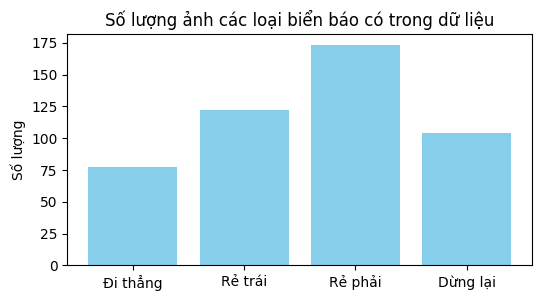

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
# Đếm số lượng từng loại nhãn
label_counts = Counter(labels_train)
_, counts = zip(*label_counts.items())
labels = ["Đi thẳng", "Rẻ trái", "Rẻ phải", "Dừng lại"]
plt.figure(figsize=(6, 3))
plt.bar(labels, counts, color='skyblue')
# plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.title('Số lượng ảnh các loại biển báo có trong dữ liệu')
# plt.xticks(fontsize = 14)
plt.show()


In [ ]:
# Kết hợp các mảng hình ảnh và nhãn thành một mảng hai chiều
combined = list(zip(images_train, labels_train))

# Trộn ngẫu nhiên các mẫu
np.random.shuffle(combined)

# Phân tách lại thành các mảng hình ảnh và nhãn
images_train, labels_train = zip(*combined)

# Chuyển đổi thành mảng numpy
images_train = np.array(images_train)
labels_train = np.array(labels_train)

In [ ]:
print("Kích thước mảng ảnh: ", images_train.shape)
print("Kích thước mảng nhãn: ", labels_train.shape)

Kích thước mảng ảnh:  (395, 64, 64, 3)
Kích thước mảng nhãn:  (395,)


In [ ]:
import tensorflow as tf
labels_train_one_hot = tf.keras.utils.to_categorical(labels_train, num_classes=4)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images_train, labels_train, test_size = 0.2)

Tạo mạng nơ ron

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPool2D
from keras.layers import Flatten, Dense, Dropout, Activation

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(AveragePooling2D())

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D())

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D())

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))



In [ ]:
aug = ImageDataGenerator(rotation_range = 0.2, zoom_range = 0.2, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit_generator(aug.flow(x_train, y_train, batch_size=32), epochs=50, verbose=1,validation_data=(x_test, y_test))

Epoch 1/50


<ipython-input-162-beb0dd07ceaf>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(aug.flow(x_train, y_train, batch_size=32), epochs=50, verbose=1,validation_data=(x_test, y_test))


10/10 [==============================] - 3s 220ms/step - loss: 9.7902 - accuracy: 0.3513 - val_loss: 0.8615 - val_accuracy: 0.6962
Epoch 2/50
10/10 [==============================] - 2s 195ms/step - loss: 0.9486 - accuracy: 0.5095 - val_loss: 0.7386 - val_accuracy: 0.6456
Epoch 3/50
10/10 [==============================] - 2s 212ms/step - loss: 0.8804 - accuracy: 0.5475 - val_loss: 0.7442 - val_accuracy: 0.6456
Epoch 4/50
10/10 [==============================] - 3s 314ms/step - loss: 0.7965 - accuracy: 0.6139 - val_loss: 0.9030 - val_accuracy: 0.5696
Epoch 5/50
10/10 [==============================] - 5s 453ms/step - loss: 0.7841 - accuracy: 0.6234 - val_loss: 0.7555 - val_accuracy: 0.6329
Epoch 6/50
10/10 [==============================] - 2s 218ms/step - loss: 0.7540 - accuracy: 0.6361 - val_loss: 0.6338 - val_accuracy: 0.6076
Epoch 7/50
10/10 [==============================] - 2s 230ms/step - loss: 0.7094 - accuracy: 0.6835 - val_loss: 0.6588 - val_accuracy: 0.6076
Epoch 8/50
10/10 

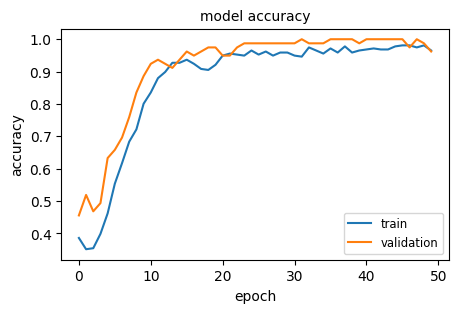

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (5, 3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy', fontsize = 10)
plt.ylabel('accuracy', fontsize = 10)
plt.xlabel('epoch', fontsize = 10)
plt.legend(['train', 'validation'], loc='lower right', fontsize='small')
plt.show()

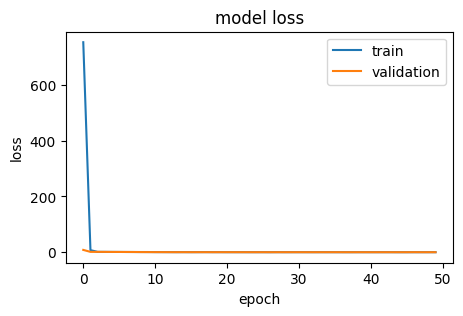

In [ ]:
plt.figure(figsize = (5, 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
model.save('/content/drive/MyDrive/Nhung/trained_model_v8.h5') #Địa chỉ lưu mô hình

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
  # !pip install visualkeras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 13.7 MB/s eta 0:00:00


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 average_pooling2d (Average  (None, 31, 31, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_27 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 14, 14, 64)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_28 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 average_pooling2d_2 (Avera  (None, 6, 6, 128)        

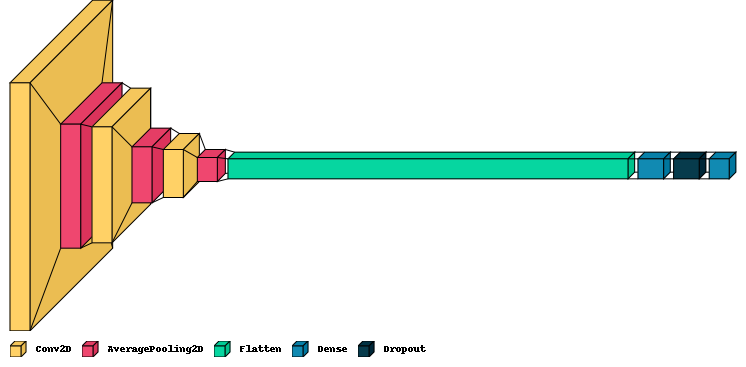

In [ ]:
import visualkeras
visualkeras.layered_view(model, legend=True)

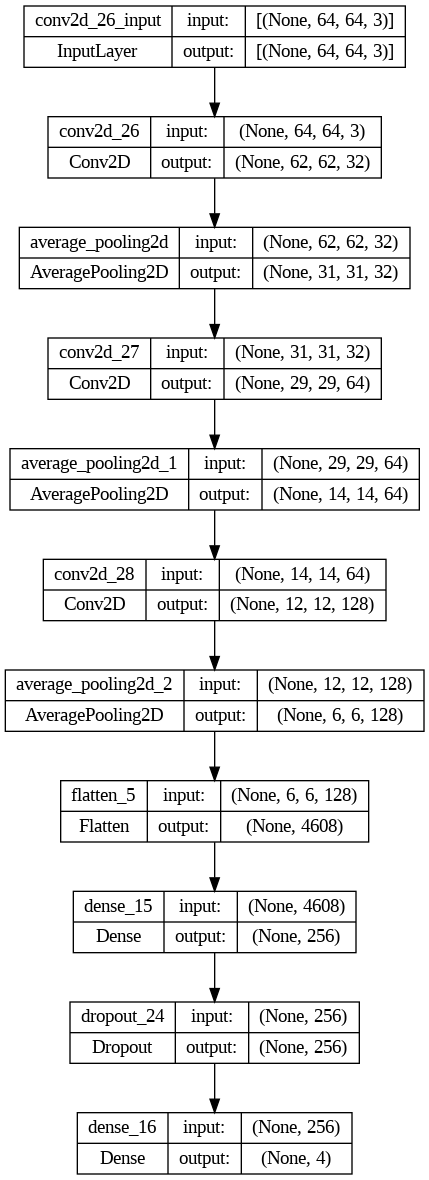

In [ ]:
from tensorflow.keras.utils import plot_model

# Tạo sơ đồ chi tiết của mô hình và lưu dưới dạng file PNG
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# Khởi tạo một danh sách để lưu trữ các ảnh và nhãn
images_test = []
labels_test = []

# Đường dẫn đến thư mục chứa ảnh cháy
image_dir_go = "/content/drive/MyDrive/Nhung/test/AHEAD"
go = 0

images, labels = read_image_from_folder(image_dir_go, go)
images_test.extend(images)
labels_test.extend(labels)

# Đường dẫn đến thư mục chứa ảnh cháy
image_dir_left = "/content/drive/MyDrive/Nhung/test/TURN_LEFT"
left = 1

images, labels = read_image_from_folder(image_dir_left, left)
images_test.extend(images)
labels_test.extend(labels)

# Đường dẫn đến thư mục chứa ảnh cháy
image_dir_right = "/content/drive/MyDrive/Nhung/test/TURN_RIGHT"
right = 2

images, labels = read_image_from_folder(image_dir_right, right)
images_test.extend(images)
labels_test.extend(labels)

# Đường dẫn đến thư mục chứa ảnh cháy
image_dir_stop = "/content/drive/MyDrive/Nhung/test/STOP"
stop = 3

images, labels = read_image_from_folder(image_dir_stop, stop)
images_test.extend(images)
labels_test.extend(labels)

100%|██████████| 19/19 [00:00<00:00, 35.16it/s]


In [ ]:
images_test = np.array(images_test)
labels_test = np.array(labels_test)

In [ ]:
print(images_test.shape)

(72, 64, 64, 3)


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/Nhung/trained_model_v8.h5")

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Convert mô hình thành định dạng TensorFlow Lite
tflite_model = converter.convert()
# Lưu mô hình TensorFlow Lite vào một tệp tin để dùng cho Raspbeery Pi
with open('/content/drive/MyDrive/Nhung/traffic_sign.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
predictions = model.predict(images_test)
# Chuyển đổi các xác suất thành nhãn lớp (lớp có xác suất cao nhất)
predicted_labels = np.argmax(predictions, axis=1)

3/3 [==============================] - 0s 39ms/step


In [ ]:
predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3])

In [ ]:
labels_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3])

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(labels_test, predicted_labels)
print("Accuracy: ", acc)

Accuracy:  0.9444444444444444


In [ ]:
image_paths = []

In [ ]:
source_dir = "/content/drive/MyDrive/Nhung/test/STOP"


# Lặp qua tất cả các tệp tin trong thư mục nguồn
for filename in os.listdir(source_dir):
    # Kiểm tra xem tệp có phải là tệp ảnh không (có thể bạn cần kiểm tra đuôi tệp để chắc chắn)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(source_dir, filename)
        image_paths.append(image_path)

In [ ]:
labelsss = ['Đi thẳng', "Rẻ trái", 'Rẻ Phải', "Dừng"]

In [ ]:
from random import shuffle
shuffle(image_paths)

1/1 [==============================] - 0s 26ms/step


<Figure size 1800x1800 with 0 Axes>

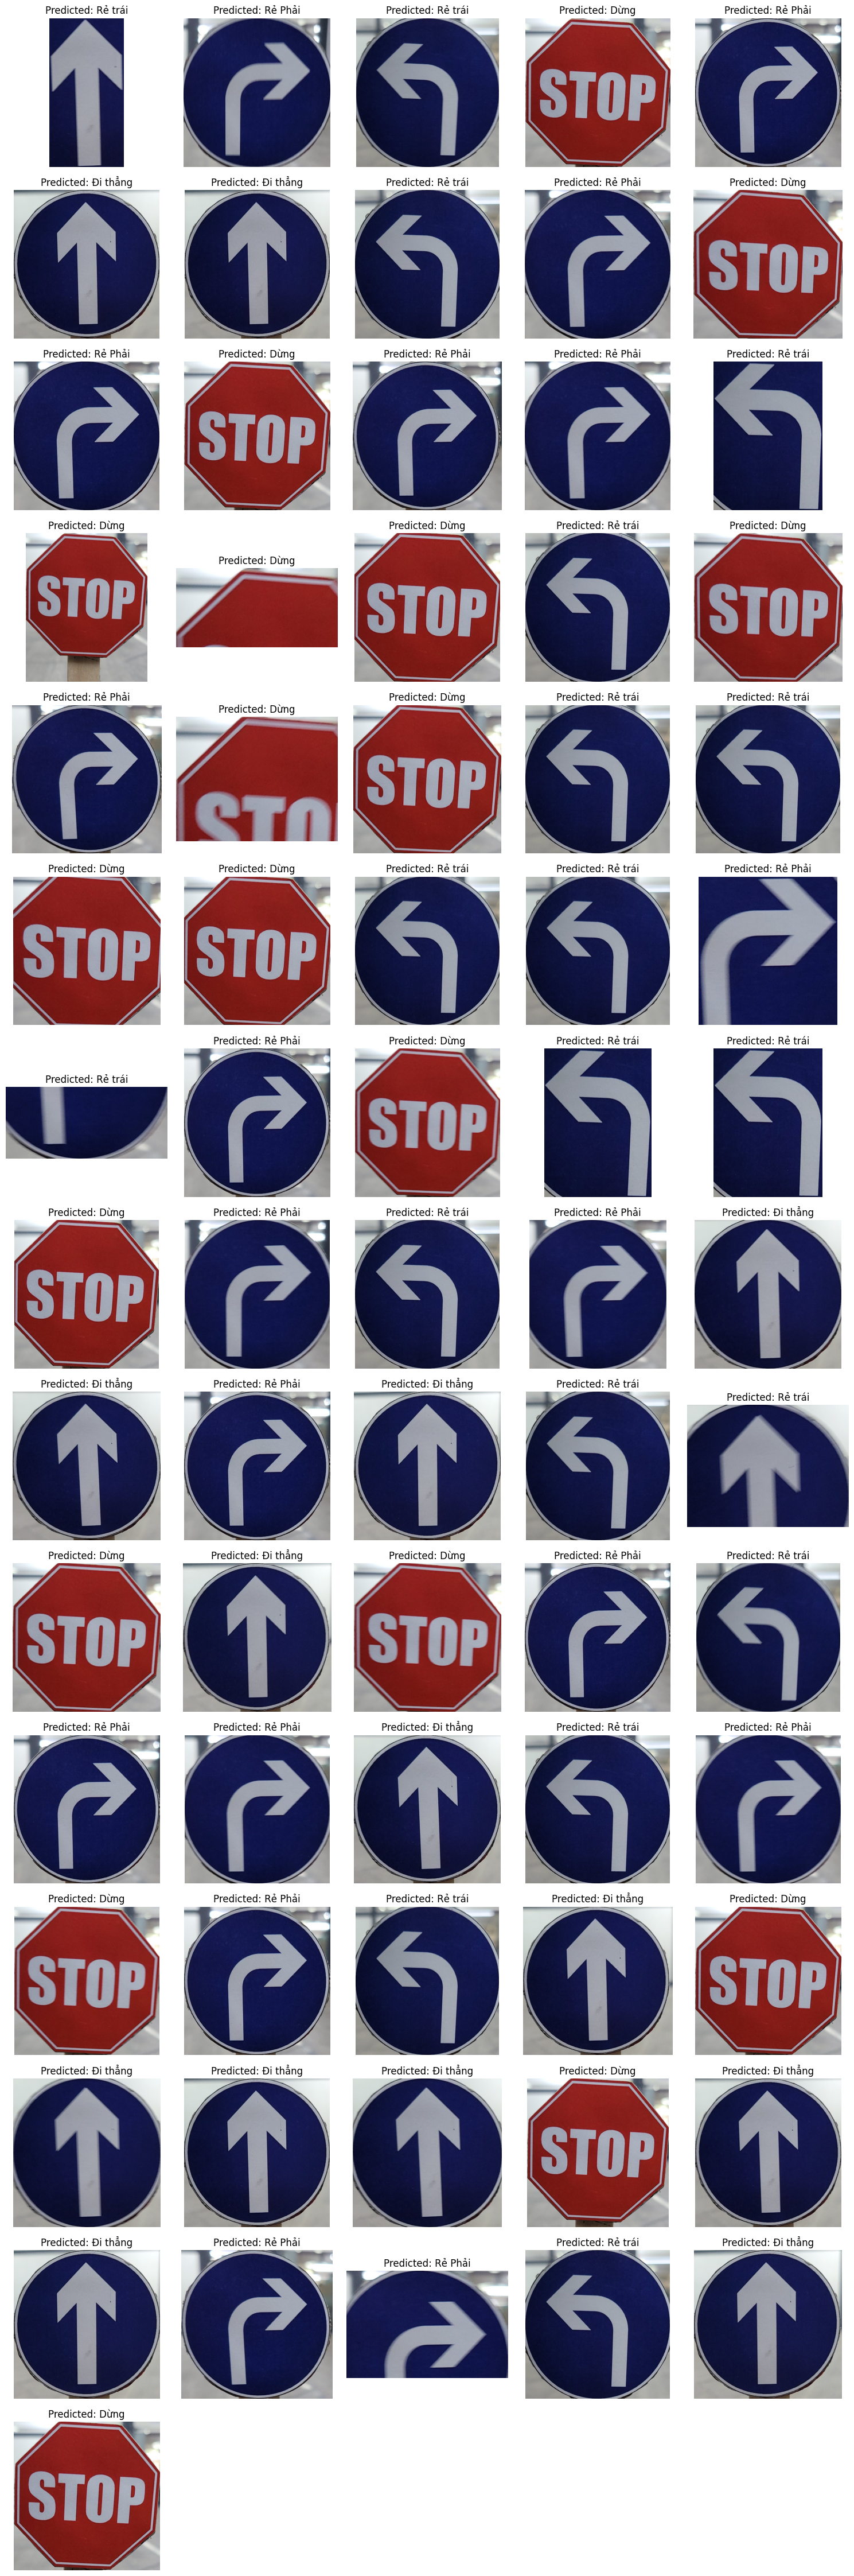

In [ ]:
import matplotlib.pyplot as plt
num_cols = 5
num_rows = len(image_paths) // num_cols + (len(image_paths) % num_cols != 0)
plt.figure(figsize=(18, 18))
plt.figure(figsize=(15, num_rows * 3))
for idx, path in enumerate(image_paths):
    ax = plt.subplot(num_rows, num_cols, idx + 1)
    image = cv2.imread(path)
    new_image = cv2.resize(image, (64, 64))  # Resize ảnh về kích thước 64x64
    new_image = np.array(new_image)  # Chuyển ảnh thành mảng numpy
    new_image = np.expand_dims(new_image, axis=0)  # Thêm một chiều để phù hợp với input của model

    # Dự đoán nhãn của ảnh
    predict1 = model.predict(new_image)
    predicted_label = np.argmax(predict1, axis=1)

    # Hiển thị ảnh trong lưới
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {labelsss[predicted_label[0]]}")
    plt.axis('off')

# Hiển thị toàn bộ lưới ảnh
plt.tight_layout()
plt.show()